In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import json
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Files to Load
player_data_to_load = os.path.join("player_data_cleaned.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")
# Inspect budget data from U.S. Department of Education 2010-2017 https://ope.ed.gov/athletics/#/datafile/list
budgets_2010_data_to_load = os.path.join("budgets/","EADA2010.csv")
budgets_2011_data_to_load = os.path.join("budgets/","EADA2011.csv")
budgets_2012_data_to_load = os.path.join("budgets/","EADA2012.csv")
budgets_2013_data_to_load = os.path.join("budgets/","EADA2013.csv")
budgets_2014_data_to_load = os.path.join("budgets/","EADA2014.csv")
budgets_2015_data_to_load = os.path.join("budgets/","EADA2015.csv")
budgets_2016_data_to_load = os.path.join("budgets/","EADA2016.csv")
budgets_2017_data_to_load = os.path.join("budgets/","EADA2017.csv")

# Read the Player and Season Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")

# Read the Budget Data From 2008-2017; reduce 4200+ columns to 17
budget2010_data_df = pd.read_csv(budgets_2010_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2011_data_df = pd.read_csv(budgets_2011_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2012_data_df = pd.read_csv(budgets_2012_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2013_data_df = pd.read_csv(budgets_2013_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2014_data_df = pd.read_csv(budgets_2014_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2015_data_df = pd.read_csv(budgets_2015_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2016_data_df = pd.read_csv(budgets_2016_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2017_data_df = pd.read_csv(budgets_2017_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])

# Save the data table for preview
#budget2010_data_df.to_csv("budget2010_data_df.csv")
#budget2011_data_df.to_csv("budget2011_data_df.csv")
#budget2012_data_df.to_csv("budget2012_data_df.csv")
#budget2013_data_df.to_csv("budget2013_data_df.csv")
#budget2014_data_df.to_csv("budget2014_data_df.csv")
#budget2015_data_df.to_csv("budget2015_data_df.csv")
#budget2016_data_df.to_csv("budget2016_data_df.csv")
#budget2017_data_df.to_csv("budget2017_data_df.csv")

In [3]:
#cleaned up
#University of California, Los Angeles	University of California-Los Angeles#
#University of North Carolina	University of North Carolina at Chapel Hill
#Indiana University	Indiana University-Bloomington
#St. John's University	St. John's University-New York
#University of Michigan	University of Michigan-Ann Arbor
#Ohio State University	Ohio State University-Main Campus
#North Carolina State University	North Carolina State University at Raleigh
#University of Minnesota	University of Minnesota-Twin Cities
#University of Maryland	University of Maryland-College Park
#Louisiana State University	Louisiana State University and Agricultural & Mechanical College
#Georgia Institute of Technology	Georgia Institute of Technology-Main Campus
#University of Nevada, Las Vegas	University of Nevada-Las Vegas

In [4]:
# Inspect budget data from U.S. Department of Education 2017 https://ope.ed.gov/athletics/#/datafile/list
#budget2017_data_df.head()

In [5]:
#budget2017_data_df.count()

In [6]:
#Merge budget data in steps
#1 - all imported together in pairs
budget_data_merged_1 = pd.merge(budget2010_data_df, budget2011_data_df, on="institution_name", suffixes=['_2010','_2011'], how="left")
budget_data_merged_2 = pd.merge(budget2012_data_df, budget2013_data_df, on="institution_name", suffixes=['_2012','_2013'], how="left")
budget_data_merged_3 = pd.merge(budget2014_data_df, budget2015_data_df, on="institution_name", suffixes=['_2014','_2015'], how="left")
budget_data_merged_4 = pd.merge(budget2016_data_df, budget2017_data_df, on="institution_name", suffixes=['_2016','_2017'], how="left")

#2 - pairs merged agains
budget_data_merged_6 = pd.merge(budget_data_merged_1, budget_data_merged_2, on="institution_name", how="left")
budget_data_merged_7 = pd.merge(budget_data_merged_3, budget_data_merged_4, on="institution_name", how="left")

#3 - final merge
budget_data_merged_total = pd.merge(budget_data_merged_6, budget_data_merged_7, on="institution_name", how="left")

budget_data_merged_total.to_csv("budget_data_merged_total.csv")

In [7]:
# Add total columns for head coach salary, expenses, and revenues
budget_data_merged_total_summed = budget_data_merged_total.copy()
budget_data_merged_total_summed['Total_StudentAid'] = budget_data_merged_total['STUDENTAID_MEN_2010'] + budget_data_merged_total['STUDENTAID_MEN_2011'] + budget_data_merged_total['STUDENTAID_MEN_2012'] + budget_data_merged_total['STUDENTAID_MEN_2013'] + budget_data_merged_total['STUDENTAID_MEN_2014'] + budget_data_merged_total['STUDENTAID_MEN_2015'] + budget_data_merged_total['STUDENTAID_MEN_2016'] + budget_data_merged_total['STUDENTAID_MEN_2017']
budget_data_merged_total_summed['Total_HeadCoachSalary'] = budget_data_merged_total['HDCOACH_SALARY_MEN_2010'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2011'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2012'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2013'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2014'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2015'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2016'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2017']
budget_data_merged_total_summed['Total_Revenue'] = budget_data_merged_total['REV_MEN_Bskball_2010'] + budget_data_merged_total['REV_MEN_Bskball_2011'] + budget_data_merged_total['REV_MEN_Bskball_2012'] + budget_data_merged_total['REV_MEN_Bskball_2013'] + budget_data_merged_total['REV_MEN_Bskball_2014'] + budget_data_merged_total['REV_MEN_Bskball_2015'] + budget_data_merged_total['EXP_MEN_Bskball_2016'] + budget_data_merged_total['EXP_MEN_Bskball_2017']
budget_data_merged_total_summed['Total_Expense'] = budget_data_merged_total['EXP_MEN_Bskball_2010'] + budget_data_merged_total['EXP_MEN_Bskball_2011'] + budget_data_merged_total['EXP_MEN_Bskball_2012'] + budget_data_merged_total['EXP_MEN_Bskball_2013'] + budget_data_merged_total['EXP_MEN_Bskball_2014'] + budget_data_merged_total['EXP_MEN_Bskball_2015'] + budget_data_merged_total['REV_MEN_Bskball_2016'] + budget_data_merged_total['REV_MEN_Bskball_2017']
#budget_data_merged_total_summed.head()
#budget_data_merged_total_summed.to_csv("budget_data_merged_total_summed.csv")

In [8]:
truncatedBudget_df = revenue_df = budget_data_merged_total_summed[['institution_name','Total_Revenue','Total_Expense']].copy()
#truncatedBudget_df

In [9]:
#truncatedBudget_df.to_csv("truncatedBudget_df.csv")

In [10]:
top25_df = budget_data_merged_total_summed[['institution_name','Total_StudentAid','Total_HeadCoachSalary','Total_Expense','Total_Revenue']].rename(columns={'Total_StudentAid':'Total Student Aid','Total_HeadCoachSalary':'Total Head Coach Salary','Total_Expense':'Total Expense','Total_Revenue':'Total Revenue'}).copy()
top25_df = top25_df.sort_values(by='Total Expense', ascending=False)
top25_df = top25_df.reset_index(drop=True).head(25)
#top25_df.head()

In [11]:
#df3 = df[(df['count'] == '2')
topSchool_df = budget_data_merged_total_summed.set_index("institution_name")
topSchool_df = topSchool_df.loc[['University of Kentucky']]
#topSchool_df.to_csv("topSchool_df.csv")
topSchool_df = topSchool_df.reset_index(drop=True)
#topSchool_df

In [12]:
topSchool_Coach_df = topSchool_df[['HDCOACH_SALARY_MEN_2010','HDCOACH_SALARY_MEN_2011','HDCOACH_SALARY_MEN_2012','HDCOACH_SALARY_MEN_2013','HDCOACH_SALARY_MEN_2014','HDCOACH_SALARY_MEN_2015','HDCOACH_SALARY_MEN_2016','HDCOACH_SALARY_MEN_2017']].rename(columns={'HDCOACH_SALARY_MEN_2010':'2010','HDCOACH_SALARY_MEN_2011':'2011','HDCOACH_SALARY_MEN_2012':'2012','HDCOACH_SALARY_MEN_2013':'2013','HDCOACH_SALARY_MEN_2014':'2014','HDCOACH_SALARY_MEN_2015':'2015','HDCOACH_SALARY_MEN_2016':'2016','HDCOACH_SALARY_MEN_2017':'2017'}).copy()
#topSchool_Coach_df

In [13]:
topSchool_Revenue_df = topSchool_df[['REV_MEN_Bskball_2010','REV_MEN_Bskball_2011','REV_MEN_Bskball_2012','REV_MEN_Bskball_2013','REV_MEN_Bskball_2014','REV_MEN_Bskball_2015','REV_MEN_Bskball_2016','REV_MEN_Bskball_2017']].rename(columns={'REV_MEN_Bskball_2010':'2010','REV_MEN_Bskball_2011':'2011','REV_MEN_Bskball_2012':'2012','REV_MEN_Bskball_2013':'2013','REV_MEN_Bskball_2014':'2014','REV_MEN_Bskball_2015':'2015','REV_MEN_Bskball_2016':'2016','REV_MEN_Bskball_2017':'2017'}).copy()
#topSchool_Revenue_df.reset_index()
#topSchool_Revenue_df

In [14]:
topSchool_Revenue_df = topSchool_Revenue_df.T
#topSchool_Revenue_df

In [15]:
topSchool_Expense_df = topSchool_df[['EXP_MEN_Bskball_2010','EXP_MEN_Bskball_2011','EXP_MEN_Bskball_2012','EXP_MEN_Bskball_2013','EXP_MEN_Bskball_2014','EXP_MEN_Bskball_2015','EXP_MEN_Bskball_2016','EXP_MEN_Bskball_2017']].rename(columns={'EXP_MEN_Bskball_2010':'2010','EXP_MEN_Bskball_2011':'2011','EXP_MEN_Bskball_2012':'2012','EXP_MEN_Bskball_2013':'2013','EXP_MEN_Bskball_2014':'2014','EXP_MEN_Bskball_2015':'2015','EXP_MEN_Bskball_2016':'2016','EXP_MEN_Bskball_2017':'2017'}).copy()
#topSchool_Expense_df.reset_index()
#topSchool_Expense_df

In [16]:
topSchool_Coach_df = topSchool_Coach_df.T
#topSchool_Coach_df

No handles with labels found to put in legend.


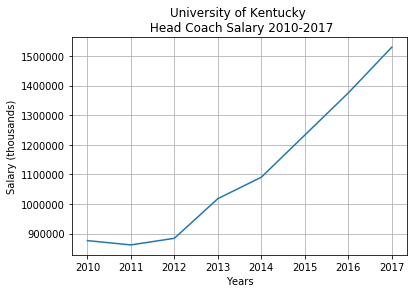

In [17]:
x_axis = topSchool_Coach_df.index

plt.plot(x_axis, topSchool_Coach_df)
plt.title("University of Kentucky \n Head Coach Salary 2010-2017")
plt.ylabel("Salary (thousands)")
plt.xlabel("Years")

plt.grid()
plt.legend().set_visible(False)
figCoach = plt.gcf()
plt.show()

In [18]:
figCoach.savefig('images/Kentucky_Coach_Salary.png', dpi=100, bbox_inches="tight")

No handles with labels found to put in legend.


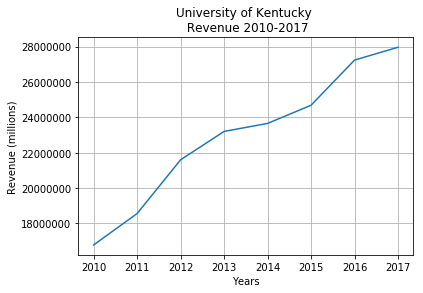

In [19]:
x_axis2 = topSchool_Revenue_df.index

plt.plot(x_axis2, topSchool_Revenue_df)
plt.title("University of Kentucky \n Revenue 2010-2017")
plt.ylabel("Revenue (millions)")
plt.xlabel("Years")
plt.ticklabel_format(style='sci', scilimits=(0, 17000000), axis='y')
plt.grid()
plt.legend().set_visible(False)
figRevenue = plt.gcf()
plt.show()

In [20]:
figRevenue.savefig('images/Kentucky_Revenue.png', dpi=100, bbox_inches="tight")

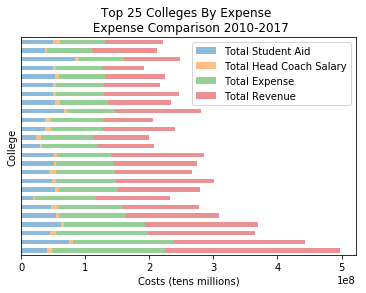

In [21]:
people = top25_df['institution_name']
top25_df.plot.barh(stacked=True,alpha=0.5)
plt.title("Top 25 Colleges By Expense \n Expense Comparison 2010-2017")
plt.ylabel("College")
plt.xlabel("Costs (tens millions)")

#plt.xticks([])
plt.yticks([])
comparison = plt.gcf()
plt.show()

In [22]:
comparison.savefig('images/top25comparison.png', dpi=100, bbox_inches="tight")

In [23]:
studentAid_df = budget_data_merged_total_summed[['Total_StudentAid','Total_Expense']].copy()
studentAid_df = studentAid_df.sort_values(by='Total_Expense', ascending=False)
studentAid_df = studentAid_df.reset_index(drop=True).head(25)
studentAid_df = studentAid_df.rename(columns={'Total_StudentAid':'Total Student Aid','Total_Expense':'Total Expense'})
#studentAid_df.head()

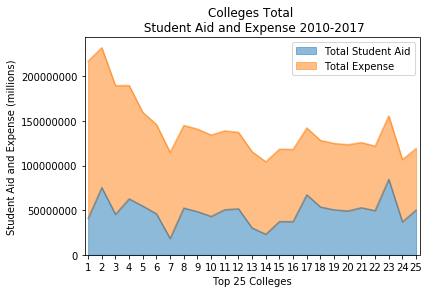

In [24]:
# plot
plot = studentAid_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Student Aid and Expense 2010-2017")
plt.xlabel("Top 25 Colleges")
plt.ylabel("Student Aid and Expense (millions)")
plt.xticks(range(len(studentAid_df.index + 1)),studentAid_df.index + 1)
plt.ticklabel_format(style='sci', scilimits=(0, 18000000), axis='y')
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)
studentAid = plt.gcf()

In [25]:
studentAid.savefig('images/top25StudentAid.png', dpi=100, bbox_inches="tight")

In [26]:
coachSalary_df = budget_data_merged_total_summed[['institution_name','Total_HeadCoachSalary','Total_Expense']].copy()
coachSalary_df = coachSalary_df.sort_values(by='Total_Expense', ascending=False)
coachSalary_df = coachSalary_df.reset_index(drop=True).head(25)
#coachSalary_df.head()

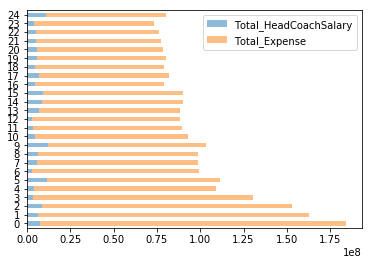

In [27]:
y_pos = np.arange(len(coachSalary_df['institution_name']))
salary = coachSalary_df['Total_HeadCoachSalary']
expense = coachSalary_df['Total_Expense']

coachSalary_df.plot.barh(stacked=True,alpha=0.5)

#plt.barh(y_pos,salary, color="red", stacked=True)
#plt.barh(y_pos,expense, color="blue", stacked=True)
plt.show()

(-0.25, 24.25)

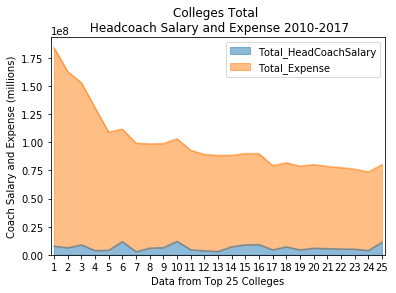

In [28]:
# plot
plot = coachSalary_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Headcoach Salary and Expense 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Coach Salary and Expense (millions)")
plt.xticks(range(len(coachSalary_df.index + 1)),coachSalary_df.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

In [29]:
revenue_df = budget_data_merged_total_summed[['institution_name','Total_Revenue','Total_Expense']].copy()
revenue_df = revenue_df.sort_values(by='Total_Expense', ascending=False)
revenue_df = revenue_df.reset_index(drop=True).head(25)
#revenue_df.head()

In [30]:
revenue_df_noInst = revenue_df[['Total_Expense','Total_Revenue']].copy()
#revenue_df_noInst.head()

(-0.25, 24.25)

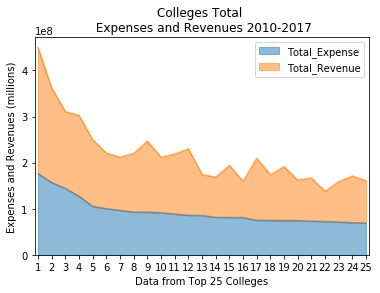

In [31]:
# plot
plot = revenue_df_noInst.plot.area(alpha=0.5)
figexpense = plot.get_figure()
plt.title("Colleges Total \n Expenses and Revenues 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Expenses and Revenues (millions)")
plt.xticks(range(len(revenue_df_noInst.index + 2)),revenue_df_noInst.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

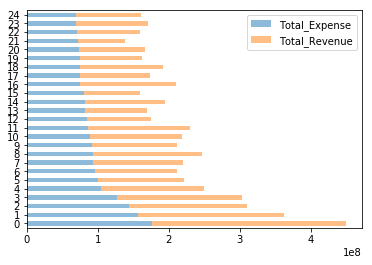

In [32]:
revenue_df_noInst.plot.barh(alpha=0.5, stacked=True)

In [33]:
maxExpense = revenue_df_noInst['Total_Expense'].max()
minExpense = revenue_df_noInst['Total_Expense'].min()
#print(f"The max expense is {maxExpense} and the min is {minExpense}")

In [34]:
#Gather variables
#Number of unique colleges
unique_college = player_data_df['college'].nunique()

#Group colleges to count players
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})

#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()

#College Mode
modeCollege_df = countByCollege['count'].sort_values(ascending=False)
modeCollege_df = modeCollege_df.reset_index(drop=True)
modeCollege = modeCollege_df.mode()
modeCollege = modeCollege.iloc[0]
modeCollege

#Earliest start year
minStartyear = player_data_df['year_start'].min()

#Latest start year
latestStartyear = player_data_df['year_start'].max()

#Number of unique players
unique_player = player_data_df['name'].nunique()

#Copy player dataframe
playerYears_df = player_data_df[['year_start','birth_date']].copy()

#Birth year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year

playerYears_df.head()
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']

averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)

#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})

firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)

currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)

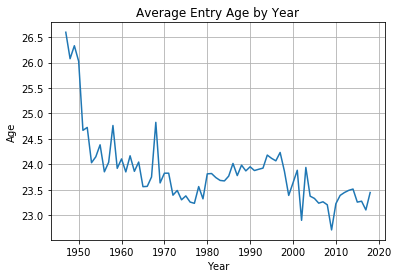

In [35]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.grid()
plt.plot(year_strt, AverAge)
age = plt.gcf()
plt.show()

In [36]:
#plt.show()
#plt.draw()
age.savefig('images/average_age.png', dpi=100)
#plt.savefig('average_age.png', dpi=100)

In [37]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
#countByCollege.head()

In [38]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
#top25colleges.head()

<BarContainer object of 25 artists>

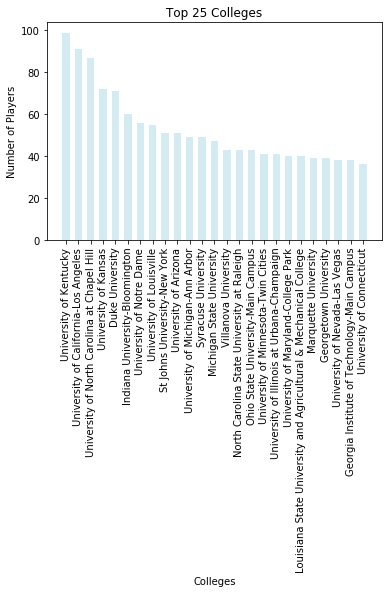

In [39]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

fig2 = plt.gcf()
plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [40]:
#fig2.savefig('top25colleges.png', dpi=100)

In [41]:
#top25colleges
#truncatedBudget_df
top25_budget_merged = pd.merge(top25colleges, truncatedBudget_df, how="left", left_on="college", right_on="institution_name")

top25_budget_merged = top25_budget_merged[['institution_name', 'Total_Expense','Total_Revenue']].rename(columns={'Total_Expense':'Total Expense','Total_Revenue':'Total Revenue'}).copy()
#top25_budget_merged.set_index('institution_name', inplace=True)
top25_budget_merged.head()

,institution_name,Total Expense,Total Revenue
0,University of Kentucky,144133449.0,166569620.0
1,University of California-Los Angeles,74282397.0,88005440.0
2,University of North Carolina at Chapel Hill,85624904.0,144504936.0
3,University of Kansas,100002548.0,120665973.0
4,Duke University,156658579.0,205155916.0


In [42]:
#top25_budget_merged.dtypes

In [43]:
#top25_budget_merged.to_csv("top25_budget_merged.csv")

In [44]:
top25_budget_merged_round = top25_budget_merged['Total Expense'] / 1000
#top25_budget_merged_round

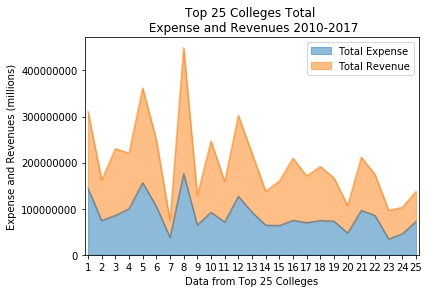

In [45]:
# plot
#pd.options.display.float_format = '{:.,}'.format
plot = top25_budget_merged.plot.area(alpha=0.5)
figexpense = plot.get_figure()
plt.title("Top 25 Colleges Total \n Expense and Revenues 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Expense and Revenues (millions)")
plt.xticks(range(len(top25_budget_merged.index + 1)),top25_budget_merged.index + 1)
plt.ticklabel_format(style='sci', scilimits=(0, 300000000), axis='y')
#plt.ticklabel_format(useOffset=False, axis='y')
#plt.ylim(0, 5*1e8)
plt.xlim(-.25, 24.25)
areaExpense = plt.gcf()

In [46]:
areaExpense.savefig('images/top25areaExpense.png', dpi=100, bbox_inches="tight")

In [47]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
#top25colleges

In [48]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges.head()

,college,count,Lat,Lng
0,University of Kentucky,99,38.0307,-84.504
1,University of California-Los Angeles,91,34.0689,-118.445
2,University of North Carolina at Chapel Hill,87,35.9049,-79.0469
3,University of Kansas,72,38.9543,-95.2558
4,Duke University,71,36.0014,-78.9382


In [49]:
#top25colleges.to_csv("output-latlong-25.csv")

In [50]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [51]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [52]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: the mode of the player count by college is {modeCollege}, which makes sense because {singleCollege_sum} of the colleges only sent one player to the NBA! ")

The data consisted of two .csvs: one that had player data and one that had seasons.
The player data had 4500 players that came from 473 unique colleges. The NBA start years ranged from 1947 to 2018. The average age of the players entering the NBA over that time is 23.93, though the average age has come down from 26.59 to 23.44 this year. One tidbit: the mode of the player count by college is 1, which makes sense because 171 of the colleges only sent one player to the NBA! 
